In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Для начала импортируем все необходимые библиотеки. Так как в zip-архиве с Kaggle у нас есть 3 файла .csv с данными, в данной работе я буду анализировать один их них - Video_Games_Sales_as_at_22_Dec_2016.csv . Выбор обусловлен тем, что, скорее всего, в данный файл входит содержимое остальных двух, и даже если это окажется не так, то я проанализирую имеющиеся данные. Создам датафрейм по выбранному файлу.

In [241]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Предварительно, данные выглядят так. На странице Kaggle VGChartz предупреждали, что в данных могут иметься пустые значения, что нужно учитывать при анализе. Далее необходимо привести данные в порядок.

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [243]:
print(df['Platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


# Единственный столбец с неправильным типом данных - год реализа. Необходимо поменять тип данных на строчный, но это можно будет сделать после того, как избавимся от пустых значений

In [244]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [245]:
df['Name'] = df['Name'].fillna('missing')
df['Year_of_Release'] = df['Year_of_Release'].fillna('missing')
df['Genre'] = df['Genre'].fillna('missing')
df['Genre'] = df['Genre'].fillna('missing')
df['Publisher'] = df['Publisher'].fillna('missing')
df['Developer'] = df['Developer'].fillna('missing')

# Представляется проблематичным замена пустых значений по столбцу 'Rating', так как на данном этапе никак нельзя заменить пустую строку на ту, которая отразит рейтинг у данной игры. Мы могли бы предсказать значение рейтинга по имеющимся у нас сущностям, но это уже задача на будущие проекты, пока что создам 2 дополнительных датафрейма без столбца 'Rating'. В первом датафрейме будут удалены стоки, имеющие пустые значения по столбцам 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', а во втором я заменю пустые строки на средние значения по данным столбцам, при это оставлю значения по столбцу 'Platform' только 'PC'.

In [246]:
df1, df2 = df, df

In [247]:
df1 = df1.dropna()

In [248]:
df2 = df2.loc[df2['Platform'] == 'PC']

In [249]:
del df2['Rating']

In [250]:
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

In [251]:
df1.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [252]:
df2.isna().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       259
Critic_Count       259
User_Score         204
User_Count         204
Developer            0
dtype: int64

In [253]:
df1.shape

(6947, 16)

In [254]:
df2.shape

(974, 15)

In [255]:
df1

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [256]:
df2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
85,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.99,6.42,0.0,0.60,8.01,86.0,75.0,7.6,886.0,The Sims Studio
138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.08,6.21,0.0,0.00,6.29,93.0,57.0,7.3,2182.0,Blizzard Entertainment
192,Diablo III,PC,2012.0,Role-Playing,Activision,2.44,2.16,0.0,0.54,5.14,88.0,86.0,4.0,9629.0,Blizzard Entertainment
195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.0,0.20,5.12,NaN,NaN,NaN,NaN,missing
218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.57,1.68,0.0,0.58,4.84,93.0,82.0,8.2,3052.0,Blizzard Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16694,Pony Friends 2,PC,2009.0,Simulation,Eidos Interactive,0.00,0.01,0.0,0.00,0.01,NaN,NaN,NaN,NaN,missing
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.0,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.0,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.0,0.00,0.01,60.0,12.0,7.2,13.0,SimBin


# Теперь мы имеем две выборки: одна исходная с очищенными данными и вторая по платформе PC. Можно построить разные визуализации, найти ключевые значения и посчитать статистики по выборкам. Так как представляется интересным проанализировать общие данные, а не локальные по PC, я решил продолжить анализ только по по первой выборке. По второй выборке будет сделана визуализация в ПО Power BI, файл с которой будет находиться также в этом репозитории.

In [257]:
z1 = df1['Global_Sales'].max()
z2 = df1['Global_Sales'].min()
z3 = df1['Global_Sales'].mean().round(2)

z4 = df2['NA_Sales'].max()
z5 = df2['NA_Sales'].min()
z6 = df2['NA_Sales'].mean().round(2)

z7 = df2['EU_Sales'].max()
z8 = df2['EU_Sales'].min()
z9 = df2['EU_Sales'].mean().round(2)

z10 = df2['JP_Sales'].max()
z11 = df2['JP_Sales'].min()
z12 = df2['JP_Sales'].mean().round(2)

z13 = df2['JP_Sales'].max()
z14 = df2['JP_Sales'].min()
z15 = df2['JP_Sales'].mean().round(2)

print(f'Максимальное значение глобальных продаж: {z1}')
print(f'Минимальное значение глобальных продаж: {z2}')
print(f'Среднее значение глобальных продаж: {z3}')
print('*' * 60)
print(f'Максимальное значение продаж по Северной Америке: {z4}')
print(f'Минимальное значение продаж по Северной Америке: {z5}')
print(f'Среднее значение продаж по Северной Америке: {z6}')
print('*' * 60)
print(f'Максимальное значение продаж по Европе: {z7}')
print(f'Минимальное значение продаж по Европе: {z8}')
print(f'Среднее значение продаж по Европе: {z9}')
print('*' * 60)
print(f'Максимальное значение продаж по Японии: {z10}')
print(f'Минимальное значение продаж по Японии: {z11}')
print(f'Среднее значение продаж по Японии: {z12}')
print('*' * 60)
print(f'Максимальное значение продаж по остальным регионам: {z13}')
print(f'Минимальное значение продаж по остальным регионам: {z14}')
print(f'Среднее значение продаж по остальным регионам: {z15}')

Максимальное значение глобальных продаж: 82.53
Минимальное значение глобальных продаж: 0.01
Среднее значение глобальных продаж: 0.77
************************************************************
Максимальное значение продаж по Северной Америке: 4.03
Минимальное значение продаж по Северной Америке: 0.0
Среднее значение продаж по Северной Америке: 0.1
************************************************************
Максимальное значение продаж по Европе: 6.42
Минимальное значение продаж по Европе: 0.0
Среднее значение продаж по Европе: 0.15
************************************************************
Максимальное значение продаж по Японии: 0.09
Минимальное значение продаж по Японии: 0.0
Среднее значение продаж по Японии: 0.0
************************************************************
Максимальное значение продаж по остальным регионам: 0.09
Минимальное значение продаж по остальным регионам: 0.0
Среднее значение продаж по остальным регионам: 0.0


In [258]:
df1.groupby(['Genre'])[['Global_Sales']].sum()

,Global_Sales
Genre,
Action,1224.12
Adventure,80.91
Fighting,250.95
Misc,424.63
Platform,378.64
Puzzle,79.27
Racing,479.80
Role-Playing,503.39
Shooter,823.81


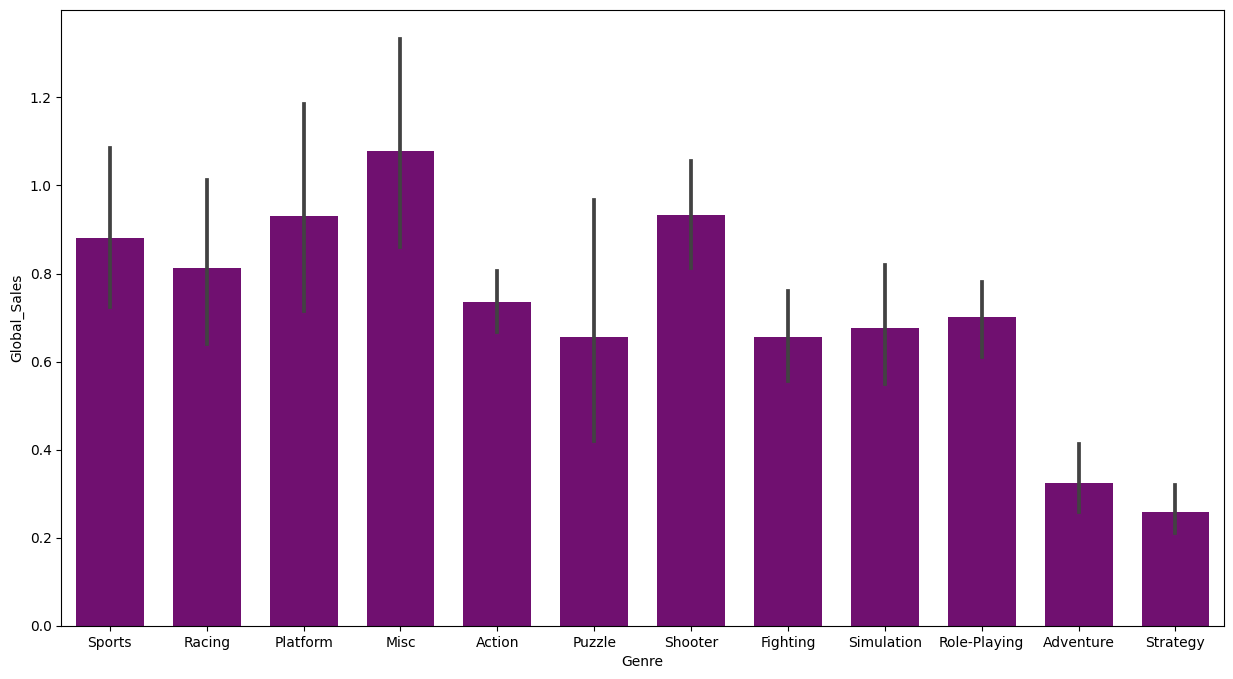

In [259]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x='Genre', y='Global_Sales', data=df1, color='purple', width=0.7)

In [260]:
df1.groupby(['Genre'])[['NA_Sales']].sum()

,NA_Sales
Genre,
Action,602.21
Adventure,38.90
Fighting,137.08
Misc,227.72
Platform,193.80
Puzzle,33.82
Racing,227.09
Role-Playing,220.28
Shooter,452.73


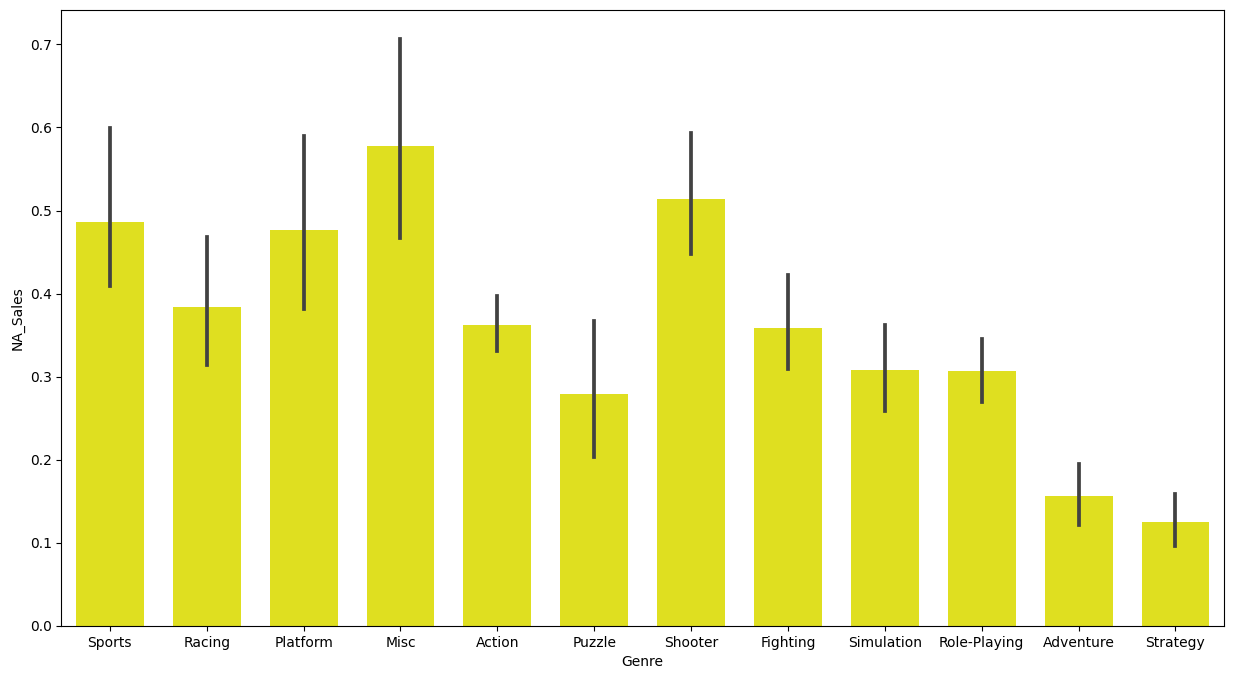

In [261]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x='Genre', y='NA_Sales', data=df1, color='yellow', width=0.7)

In [262]:
df1.groupby(['Genre'])[['EU_Sales']].sum()

,EU_Sales
Genre,
Action,394.98
Adventure,25.12
Fighting,60.76
Misc,122.09
Platform,109.17
Puzzle,24.06
Racing,166.24
Role-Playing,119.67
Shooter,263.68


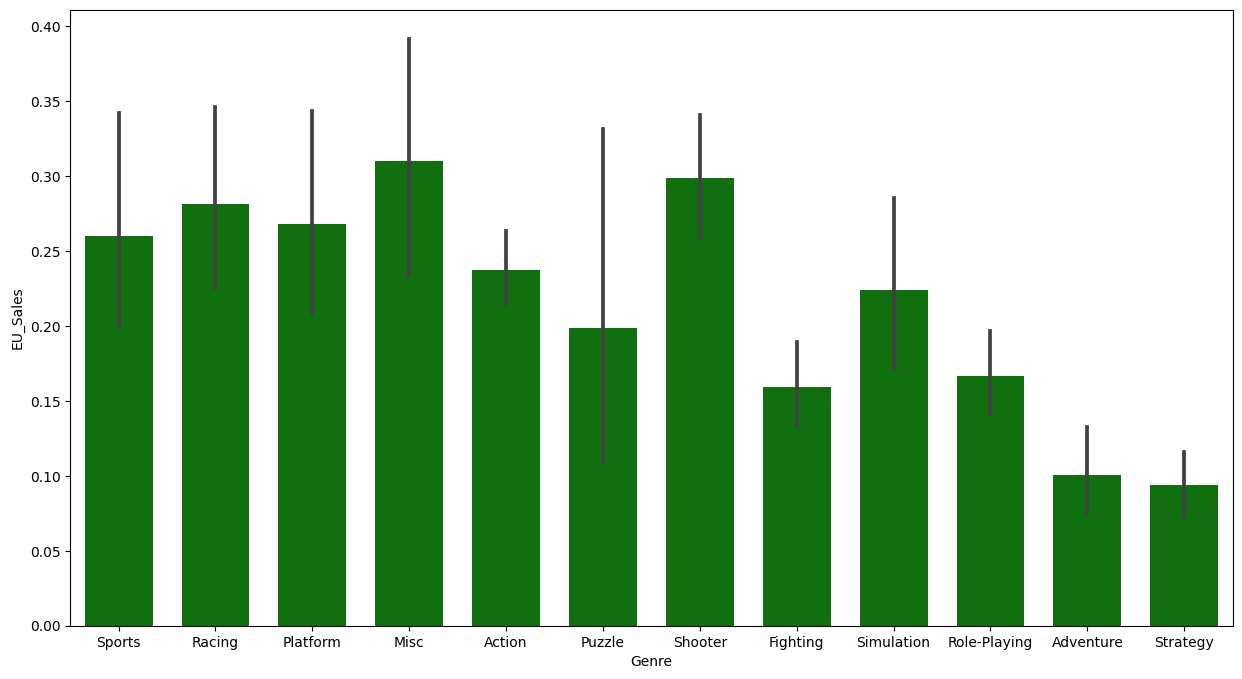

In [263]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x='Genre', y='EU_Sales', data=df1, color='green', width=0.7)

In [264]:
df1.groupby(['Genre'])[['JP_Sales']].sum()

,JP_Sales
Genre,
Action,76.81
Adventure,8.73
Fighting,27.85
Misc,33.22
Platform,43.09
Puzzle,14.98
Racing,27.77
Role-Playing,123.07
Shooter,18.63


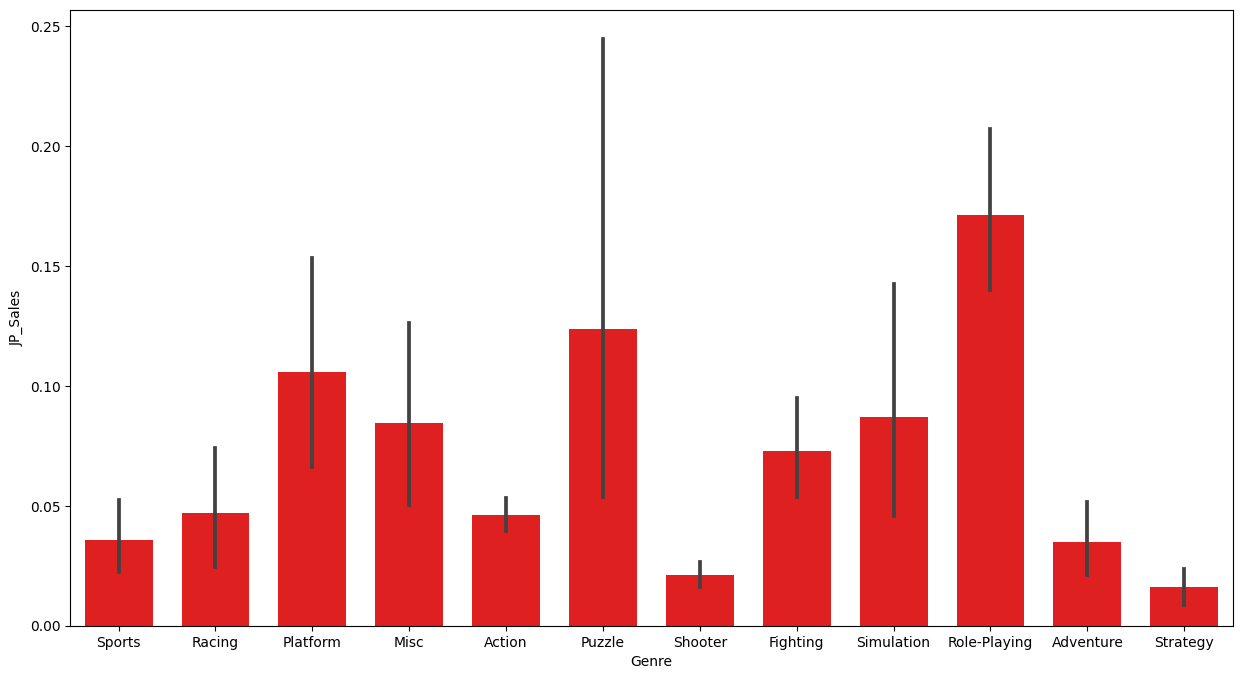

In [265]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x='Genre', y='JP_Sales', data=df1, color='red', width=0.7)

In [266]:
df1.groupby(['Genre'])[['Other_Sales']].sum()

,Other_Sales
Genre,
Action,149.60
Adventure,8.06
Fighting,25.21
Misc,41.48
Platform,32.57
Puzzle,6.36
Racing,58.77
Role-Playing,40.54
Shooter,88.62


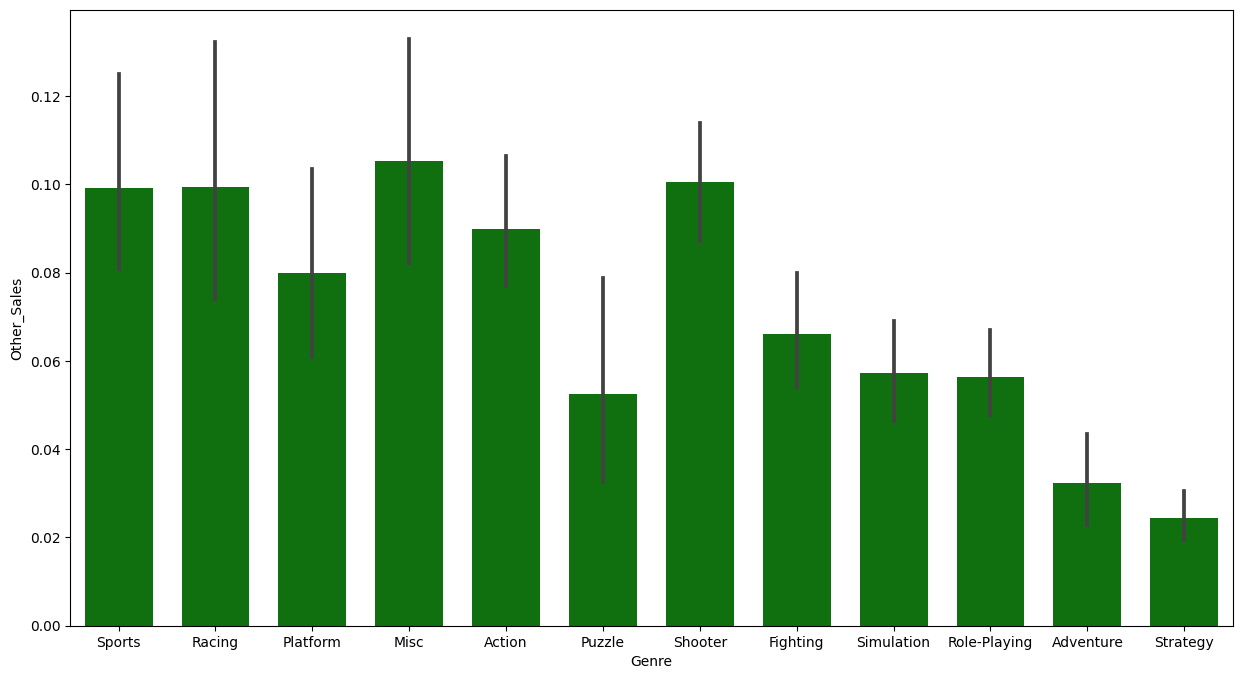

In [267]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x='Genre', y='Other_Sales', data=df1, color='green', width=0.7)

# По столбчатым диаграммам можно сделать однозначный вывод, что распределение продаж по Японскому сегменту отличается от любого другого региона, макисмальное число продаж приходиться на жанр 'Role-playing', а минимальное число продаж на жанры 'Strategy' и 'Shooter', который является лидером по продажам по всем другим регионам и является лидером по общей выборке. 

# Далее я создам Датафрейм из первого датафрейма, в котором не будет строк с пропущенным годом реализа, чтобы построить гистограмму частот реализа игр по годам

In [268]:
df3 = df1.loc[df1['Year_of_Release'] != 'missing']
df3['Year_of_Release'] = df3['Year_of_Release'].astype(int)

C:\Users\Илья\AppData\Local\Temp\ipykernel_14436\397434783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year_of_Release'] = df3['Year_of_Release'].astype(int)


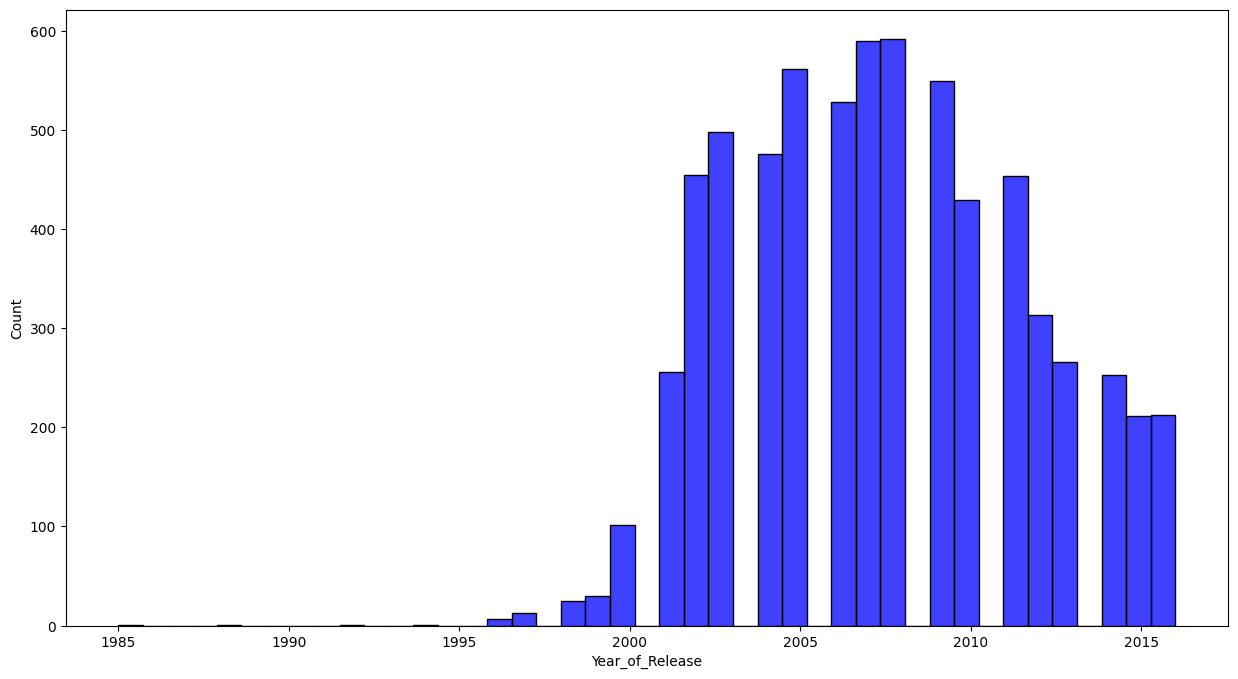

In [269]:
plt.figure(figsize=(15,8))

ax = sns.histplot(x='Year_of_Release', data=df3, color='blue',)

# Полученное распределение скошено вправо, является унимодальным, прерывистое, при этом оно напоминает нормальное, хоть таковым не явялется. По графику можно утверждать, что большая часть участвовавших в анализе игр были с датой реализа в 2006 - 2008 гг.

# Также можно проверить взаимосвязи между нашими пемененными в данных при помощи статистических критериев. Было бы интересно, существует ли взаимосвязь между значений оценок пользователей и критиков. Для этого можно попробовать использовать коэффициент корреляции.

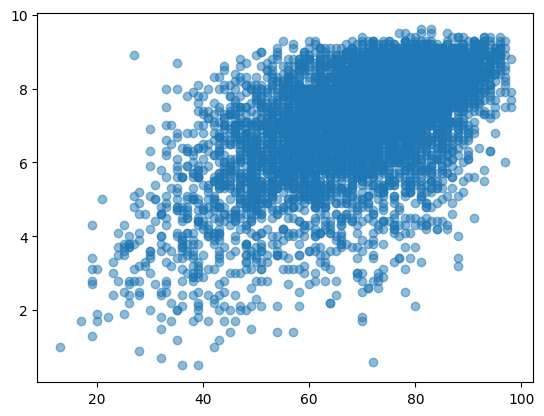

In [270]:
fig, ax = plt.subplots()

x = df1['User_Score']
y = df1['Critic_Score']

ax.scatter(y, x, alpha=0.5)

<AxesSubplot:xlabel='Critic_Score', ylabel='Count'>

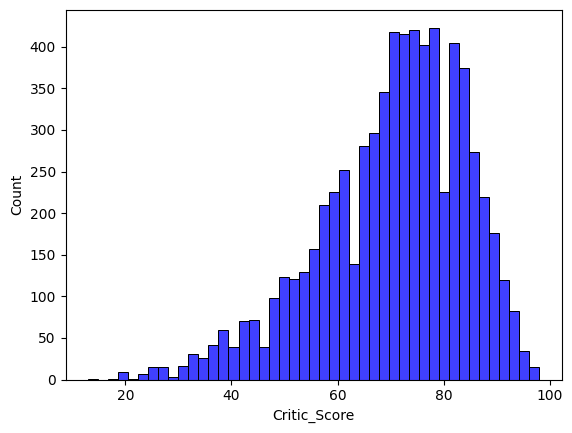

In [271]:
sns.histplot(x='Critic_Score', data=df3, color='blue',)

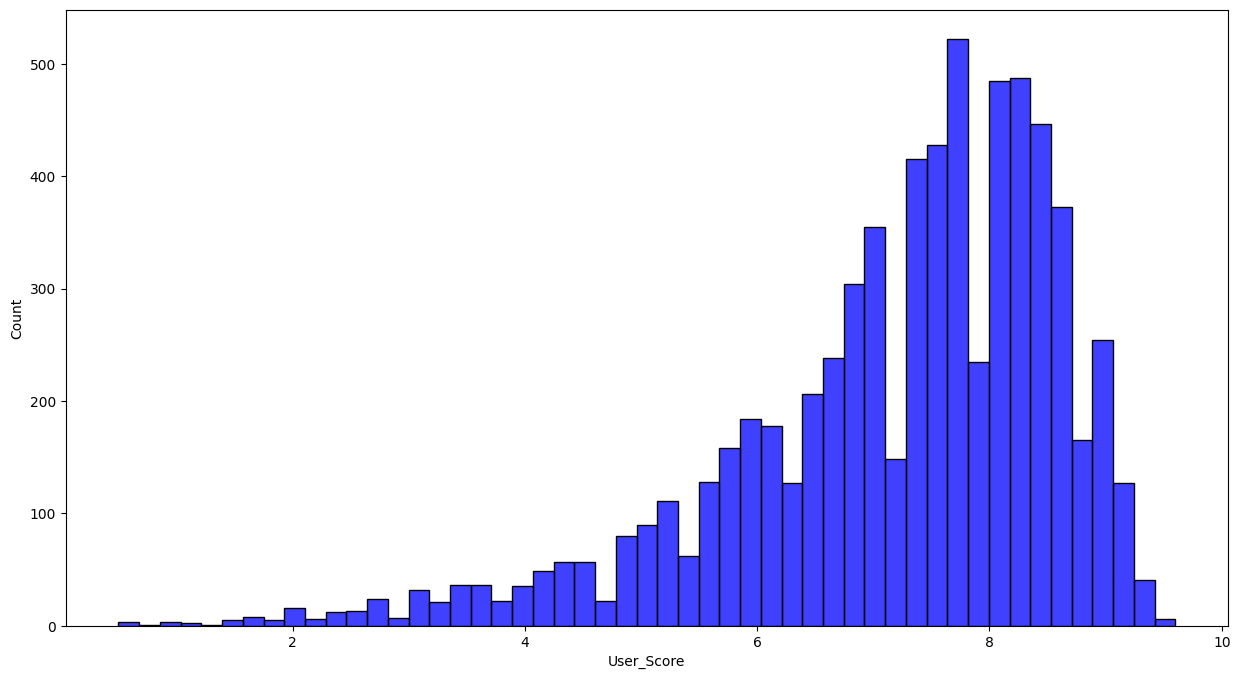

In [272]:
plt.figure(figsize=(15,8))

ax = sns.histplot(x='User_Score', data=df3, color='blue',)

In [273]:
x1 = df1['User_Score']
y1 = df1['Critic_Score']

stat_1 = stats.pearsonr(x1, y1)
stat_1

PearsonRResult(statistic=0.5820607922708085, pvalue=0.0)

In [274]:
stat_2 = stats.kendalltau(x1, y1)
stat_2

KendalltauResult(correlation=0.3888276855293771, pvalue=0.0)

In [275]:
print('Коэффицент корреляции = ' + str(df1['User_Score'].corr(df1['Critic_Score'])))
print('Коэффицент детерминации = ' + str(df1['User_Score'].corr(df1['Critic_Score']) ** 2))

Коэффицент корреляции = 0.5820607922708072
Коэффицент детерминации = 0.33879476589891977


# По результатам непараметрических и параметрических тестов оценки дисперсий между двумя группами оценок, было выявлена взаимосвязь между двумя переменными, при этом значение коэффициента корреляции составилло ~ 0.58, а коэффицент детерминации составляет ~ 0,34, что очень мало при условии их доказанной взаимосвязи. Подобный результат может быть объясним большим размером выборок, что влияет на конечный результат.